In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [28]:
import pandas as pd
import numpy as np
import numpy.linalg as la
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from src.features.build_features import KMeans, PCA

In [5]:
datafile = "../data/processed/UTK-peers_processed.csv"
df = pd.read_csv(datafile)

In [6]:
df.head()

,Name,IPEDS#,% Blk Total Students,% Hisp Total Students,2017 US News top 65,Total Enroll,% Grad Enroll,Six-year graduation rate,ACT/ SAT Avg,Fresh Admit Rate,...,Student Services Expenditures,Endowment Figure,Endowment per Student FTE,Total Faculty.1,Total Tenure /Tenure-Track Facutly.1,Carm R1_1,Carm R1_2,2014 Med School_pre clin,2014 Med School_x,Vet School_True
0,Univ. of Tennessee - Knoxville,221759.0,6.625965,3.404561,46,27845,21.483211,70,27.0,76.295299,...,30587.112868,782734414,30587.112868,1526,1117,1,0,0,0,1
1,Univ. of Georgia,139959.0,8.048713,4.732909,18,36130,23.755882,85,27.5,52.877649,...,27830.636107,939024216,27830.636107,1918,1606,1,0,0,0,1
2,Purdue Univ.,243780.0,2.994663,4.128780,20,40472,24.491006,75,26.5,58.969601,...,66375.581533,2445541926,66375.581533,1783,1700,1,0,0,0,1
3,Texas A&M Univ.,228723.0,3.203109,19.193581,27,63813,23.277389,79,26.0,66.642580,...,180613.450122,10521034492,180613.450122,2983,1995,1,0,1,0,1
4,Michigan State Univ.,171100.0,6.591080,4.020737,33,50538,22.547390,77,25.5,66.280453,...,55180.107179,2549137018,55180.107179,2616,1811,1,0,0,1,1


In [7]:
df_num = df.select_dtypes(exclude=['object'])

In [8]:
km = KMeans()

In [9]:
km.fit(df_num.values, k=5, num_starts=10)

In [10]:
km.predict(df_num.values)

array([0, 0, 4, 3, 1, 1, 0, 0, 1, 0, 0, 4, 1, 4, 1, 1, 1, 1, 4, 1, 0, 4,
       1, 4, 4, 1, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       4, 0, 0, 0, 4, 0, 4, 4, 4, 0, 4, 0, 2])

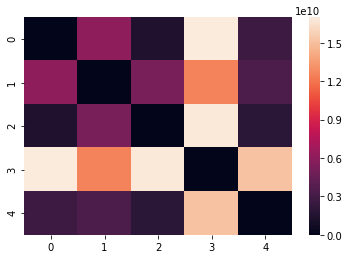

In [11]:
sns.heatmap(km.intercluster_distance())

In [12]:
km.predict(df_num.values)

array([0, 0, 4, 3, 1, 1, 0, 0, 1, 0, 0, 4, 1, 4, 1, 1, 1, 1, 4, 1, 0, 4,
       1, 4, 4, 1, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       4, 0, 0, 0, 4, 0, 4, 4, 4, 0, 4, 0, 2])

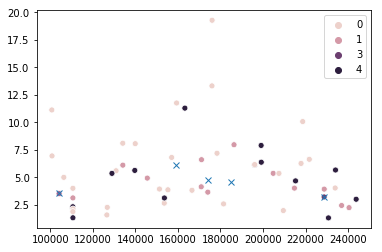

In [13]:
km.plot_km(df_num.values)

In [14]:
km.dunn_index(df_num.values)

0.5193628148544032

In [30]:
k_array = [_ for _ in range(2, df_num.shape[0])]
dunn_score = []
for k in k_array:
    kmt = KMeans()
    kmt.fit(df_num.values, k)
    di = kmt.dunn_index(df_num.values)
    dunn_score.append(di)
    print(f"{k}\t\t{di:0.2f}")

2		0.46
3		0.23
4		0.51
5		0.05
6		0.04
7		0.70
8		0.04
9		0.03
10		0.03
11		0.11
12		0.06
13		0.18
14		0.04
15		0.10
16		0.05
17		0.05
18		0.11
19		0.10
20		0.26
21		0.12
22		0.08
23		0.13
24		0.16
25		0.09
26		0.11
27		0.09
28		0.10
29		0.09
30		0.07
31		0.06
32		0.08
33		0.05
34		0.08
35		0.11
36		0.09
37		0.07
38		0.18
39		0.16
40		0.15
41		0.14
42		0.06
43		0.11
44		0.28
45		0.10
46		0.11
47		0.23
48		0.11
49		0.14
50		0.11
51		0.26
52		0.14
53		0.32
54		0.26
55		0.25
56		0.25


[]

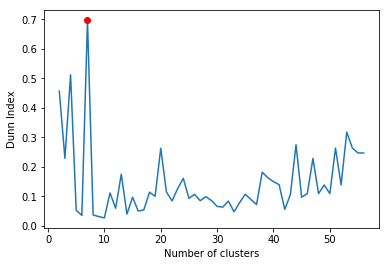

In [33]:
plt.plot(k_array, dunn_score)
plt.xlabel("Number of clusters")
plt.ylabel("Dunn Index")
best_di = max(dunn_score)
best_k = k_array[dunn_score.index(best_di)]
plt.plot(best_k, best_di, 'ro')
plt.plot()